# Semestrální práce KMA/NA

Jan Půlpán

## Úkol 9.

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

def plot_bwimg(image, title=''):
    m, n = image.shape
    dpi=96
    plt.figure(figsize=(n/96, m/96), dpi=dpi)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    plt.imshow(image, cmap=plt.cm.gray, vmin=0, vmax=255)
    plt.show()

### 9. Aproximace matice pomocí singulárního rozkladu

Nejprve načteme obrázek z souboru `playa.tiff`. Fotka je sice černobílá, ale v souboru jsou uloženy všechny 4 kanály. Proto provedeme konverzi do jednoho (jasového) kanálu. 

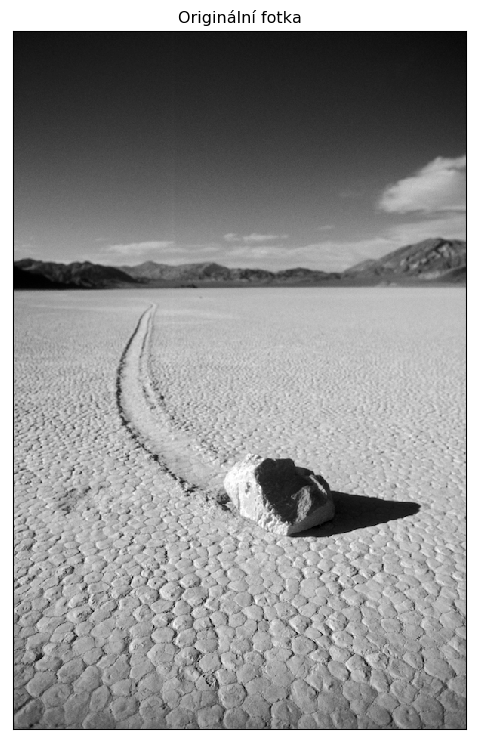

In [2]:
img = plt.imread('playa.tiff')
A = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])
plot_bwimg(A, title='Originální fotka')

Pomocí `numpy.linalg.svd()` provedeme singulární rozklad matice která popisuje obrázek.

In [3]:
%%time
U, s, Vh = la.svd(A)

CPU times: user 443 ms, sys: 34.9 ms, total: 478 ms
Wall time: 284 ms


Zajímá nás sloupcová hodnost matice $A$ a taky rozložení jejích singulárních čísel, které je zobrazené na následujícím obrázku.

Typ matice A: 925 x 600
Sloupcová hodnost matice A: 600


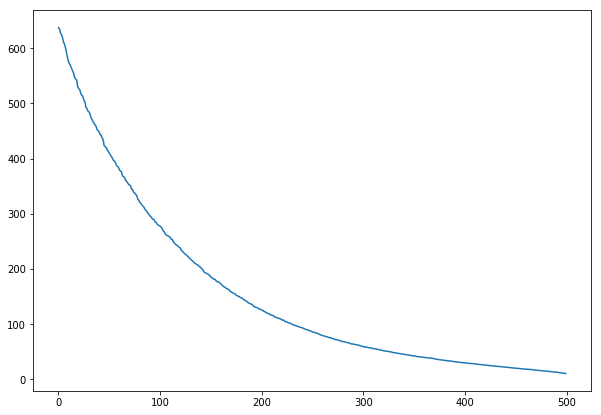

In [7]:
print(f'Typ matice A: {A.shape[0]} x {A.shape[1]}')
print(f'Sloupcová hodnost matice A: {np.linalg.matrix_rank(A)}')
plt.figure(figsize=(10,7))
plt.plot(s[100:])
plt.show()

Matice $A$ má plnou sloupcovou hodnost, pokusíme se ji aproximovat maticí s nižší hodností. Pro různé hodnoty $k$ vypočteme nejlepší aproximaci $A_k$ matice $A$ hodnosti $k$. Subjektivně pak vybereme tu variantu, která je dostatečně blízká originální fotce a přitom zaručuje co největší kompresi dat, tedy $k$ je co nejmenší.

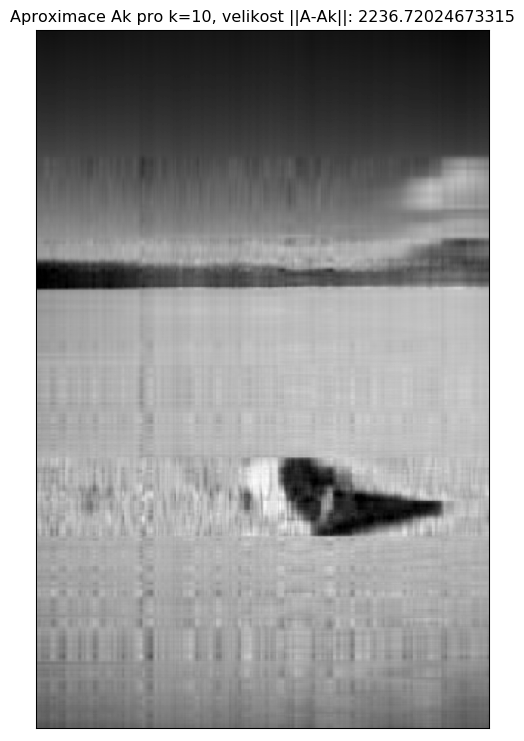

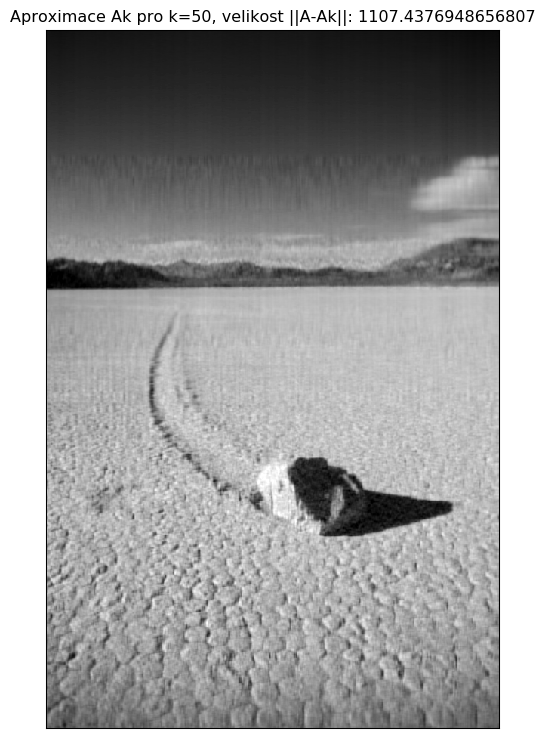

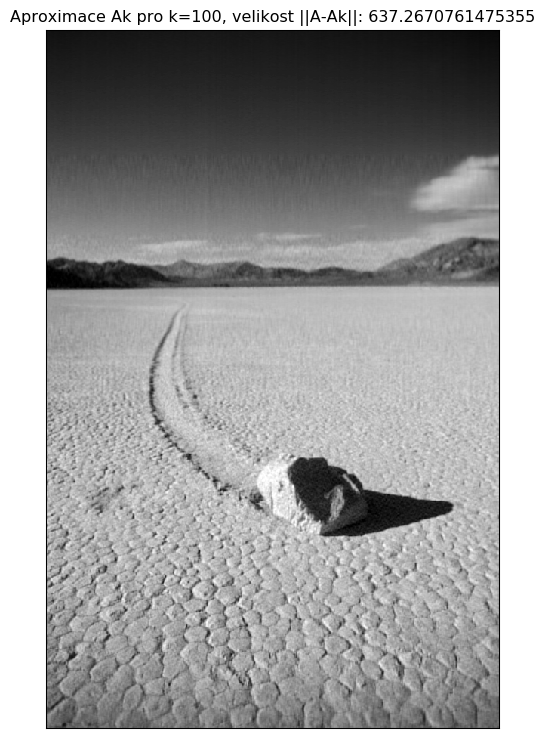

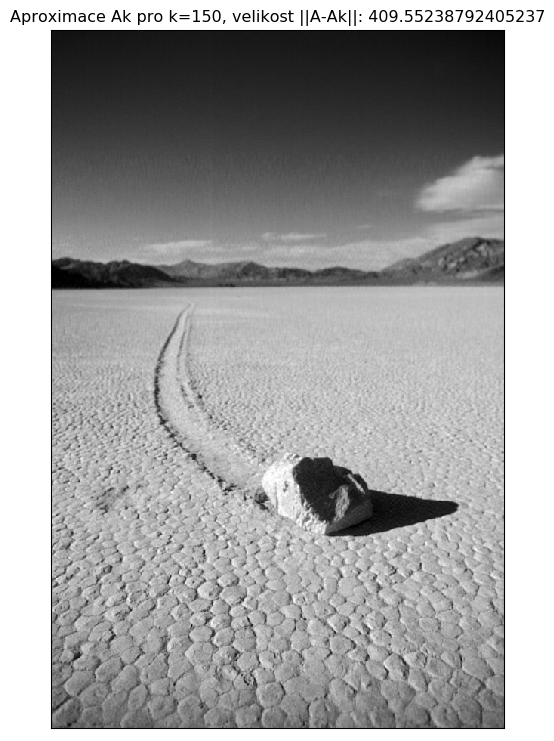

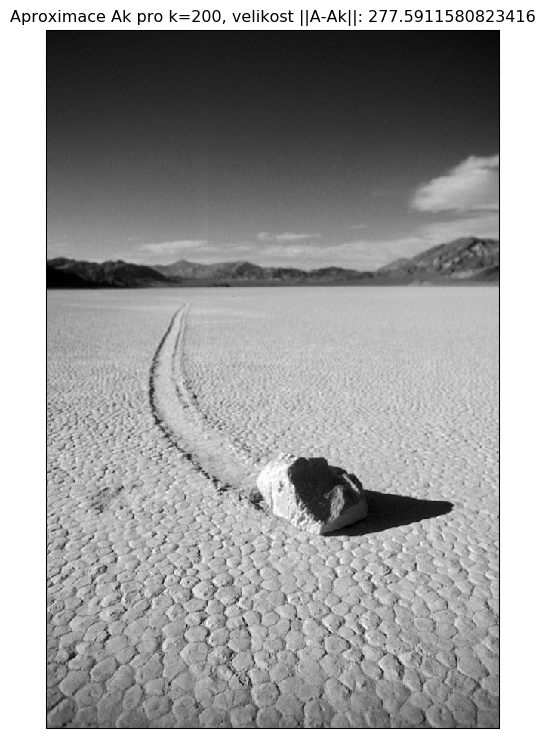

In [10]:
ks = [10, 50, 100, 150, 200]
for k in ks:
    img_cmp = U[:,:k-1] @ np.diag(s[:k-1]) @ Vh[:k-1,:]
    plot_bwimg(img_cmp, title=f'Aproximace Ak pro k={k}, velikost ||A-Ak||: {s[k]}')

Sice jsou pro $k = 150$ v obrázku ještě viditelné zkreslené fragmenty a ztráta detailů, ale subjektivně je fotka v pořádku. Výsledný obrázek uložíme do souboru `playa_cmp.jpg`.

In [11]:
k=150
img_cmp = U[:,:k-1] @ np.diag(s[:k-1]) @ Vh[:k-1,:]
plt.imsave('playa_cmp.jpg', img_cmp, cmap=plt.cm.gray, vmin=0, vmax=255)